# Importing Libraries

In [1183]:
import pandas as pd
import seaborn as sb
import numpy as np
import squarify 
import matplotlib.pyplot as plt

%matplotlib inline

# Loading Data and Taking A Quick Look

In [1413]:
autoRisk = pd.read_csv('AutoInsuranceRisk_training.csv',sep=";")
autoRisk.head(5)

,ContractId,Age,Gender,Children,Profession,Customer Type,Multiple cars,Driving Licence Years,Car category,Annual Kilometers,Gearbox,Fuel,Claim
0,1211,44,Woman,equalormorethan4,Unemployed,Agency,Yes,19,Sedan,36087,Automatic,Diesel,No
1,1212,21,Woman,0,Private Sector - Director,On-line,No,3,SUV,30367,Manual,Diesel,No
2,1213,76,Woman,1,Private Sector - Employee,Agency,No,19,SUV,27640,Automatic,Diesel,No
3,1214,29,Woman,equalormorethan4,Private Sector - Employee,On-line,No,11,Sedan,22780,Automatic,Diesel,No
4,1215,44,Man,0,Private Sector - Director,Agency,No,11,SUV,36477,Automatic,Diesel,No


In [1379]:
autoRisk.loc[autoRisk.Children == 'equalormorethan4','Children'] = '>=4'
autoRisk.head()

,ContractId,Age,Gender,Children,Profession,Customer Type,Multiple cars,Driving Licence Years,Car category,Annual Kilometers,Gearbox,Fuel,Claim
0,1211,44,Woman,>=4,Unemployed,Agency,Yes,19,Sedan,36087,Automatic,Diesel,No
1,1212,21,Woman,0,Private Sector - Director,On-line,No,3,SUV,30367,Manual,Diesel,No
2,1213,76,Woman,1,Private Sector - Employee,Agency,No,19,SUV,27640,Automatic,Diesel,No
3,1214,29,Woman,>=4,Private Sector - Employee,On-line,No,11,Sedan,22780,Automatic,Diesel,No
4,1215,44,Man,0,Private Sector - Director,Agency,No,11,SUV,36477,Automatic,Diesel,No


# Shape of The Dataset

In [275]:
autoRisk.shape

(8221, 13)

# Checking The Datatypes of The Variables

In [276]:
autoRisk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8221 entries, 0 to 8220
Data columns (total 13 columns):
ContractId               8221 non-null int64
Age                      8221 non-null int64
Gender                   8221 non-null object
Children                 8221 non-null object
Profession               8221 non-null object
Customer Type            8221 non-null object
Multiple cars            8221 non-null object
Driving Licence Years    8221 non-null int64
Car category             8221 non-null object
Annual Kilometers        8221 non-null int64
Gearbox                  8221 non-null object
Fuel                     8221 non-null object
Claim                    8221 non-null object
dtypes: int64(4), object(9)
memory usage: 835.1+ KB


In [277]:
autoRisk.dtypes.value_counts()

object    9
int64     4
dtype: int64

# Observations:
- There are **8221 rows of records** with **12 features** and **1 label**
- For this dataset, the **label variable is Claim**
- There are **9 categorical variables** and **4 numeric variables**
***

# Quick Check for NaN values

In [1109]:
autoRisk.isna().sum()

ContractId               0
Age                      0
Gender                   0
Children                 0
Profession               0
Customer Type            0
Multiple cars            0
Driving Licence Years    0
Car category             0
Annual Kilometers        0
Gearbox                  0
Fuel                     0
Claim                    0
dtype: int64

# Observations:
- There's **no NaN values**.
***

# Getting to Know The Distribution of The Variables
- *Visualizing the distribution of the data by the two Claim groups:* ***'Yes'*** *and* ***'No'*** 

## *Visualizing Spread of Data of The Numeric Variables with Violin Plot*

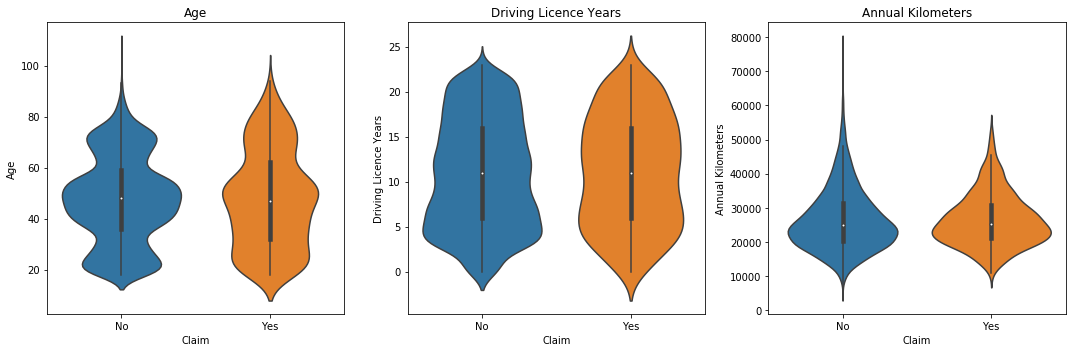

In [1113]:
position = 131

numericCols = autoRisk.iloc[:,1:].select_dtypes(exclude='object').columns.tolist()

plt.figure(figsize=(15,5))

for col in numericCols:
    ax = plt.subplot(position)
    ax = sb.violinplot(x='Claim',y=col,data=autoRisk)
    plt.title(col)
    position += 1
    plt.tight_layout()

# Violins' Shapes Compare And Contrast:
- **Age**: 
    - Records with claim equals to No is fatter in the middle region at between age range 40 to 60; 
    - Records with claim equals to Yes concentrates at region below age 55
    - **Inference**: Accepted claims tend to be younger; applicants of older age is more likely to get rejected
- **Driving Licence**: 
    - the shapes of the two violins seem identical, overall
    - *however*, claims that are rejected tend to concentrate at lower age range, especially at around 5 years
- **Annual Kilometers**:
    - the major regions of the violin pairs appear identical
    - however, rejected claims is longer in shape than accepted claims; it can means that applicants with too low or too high annual kilometers tend to get rejected

In [1121]:
autoRisk.describe().round(2)

,ContractId,Age,Driving Licence Years,Annual Kilometers
count,8221.00,8221.00,8221.00,8221.00
mean,4995.81,47.54,10.87,26524.31
std,2884.62,17.31,6.08,8894.27
min,1.00,18.00,0.00,5874.00
25%,2508.00,36.00,6.00,20215.00
50%,4996.00,47.00,11.00,24905.00
75%,7487.00,59.00,16.00,31275.00
max,10000.00,106.00,23.00,77401.00


# Percentage Breakdown by Claim Results And Each Categorical Variables' Subcategories 

In the following results, the percentage shares are sorted descendingly in variable's each subcategory.

In [1289]:
catCols = autoRisk.select_dtypes(include='object').columns.tolist()
a = catCols[:-1]
# a = ['Claim']
# a += catCols[:-1])

for col in a:
    claimCol = autoRisk.groupby([col,'Claim']).ContractId.agg('count').sort_values(ascending=False)
    claimCol = pd.DataFrame(claimCol.groupby(level=0).apply(lambda x: (x/float(x.sum()))))
    claimCol['ContractId'] = claimCol['ContractId'].map('{:,.2%}'.format)
    claimCol = claimCol.unstack(1)
    claimCol = claimCol.rename(columns = {'ContractId':'Percentage (%)'})
    print(claimCol)
    print('---------------------------------------------------------')

       Percentage (%)        
Claim              No     Yes
Gender                       
Man            87.77%  12.23%
Woman          93.83%   6.17%
---------------------------------------------------------
         Percentage (%)        
Claim                No     Yes
Children                       
0                83.72%  16.28%
1                90.98%   9.02%
2                90.77%   9.23%
3                90.71%   9.29%
>=4              94.37%   5.63%
---------------------------------------------------------
                          Percentage (%)        
Claim                                 No     Yes
Profession                                      
Government                        88.81%  11.19%
Independant                       91.20%   8.80%
Private Sector - Director         91.60%   8.40%
Private Sector - Employee         94.64%   5.36%
Private Sector - Manager          90.85%   9.15%
Public Sector - Director          93.78%   6.22%
Public Sector - Employee          90.

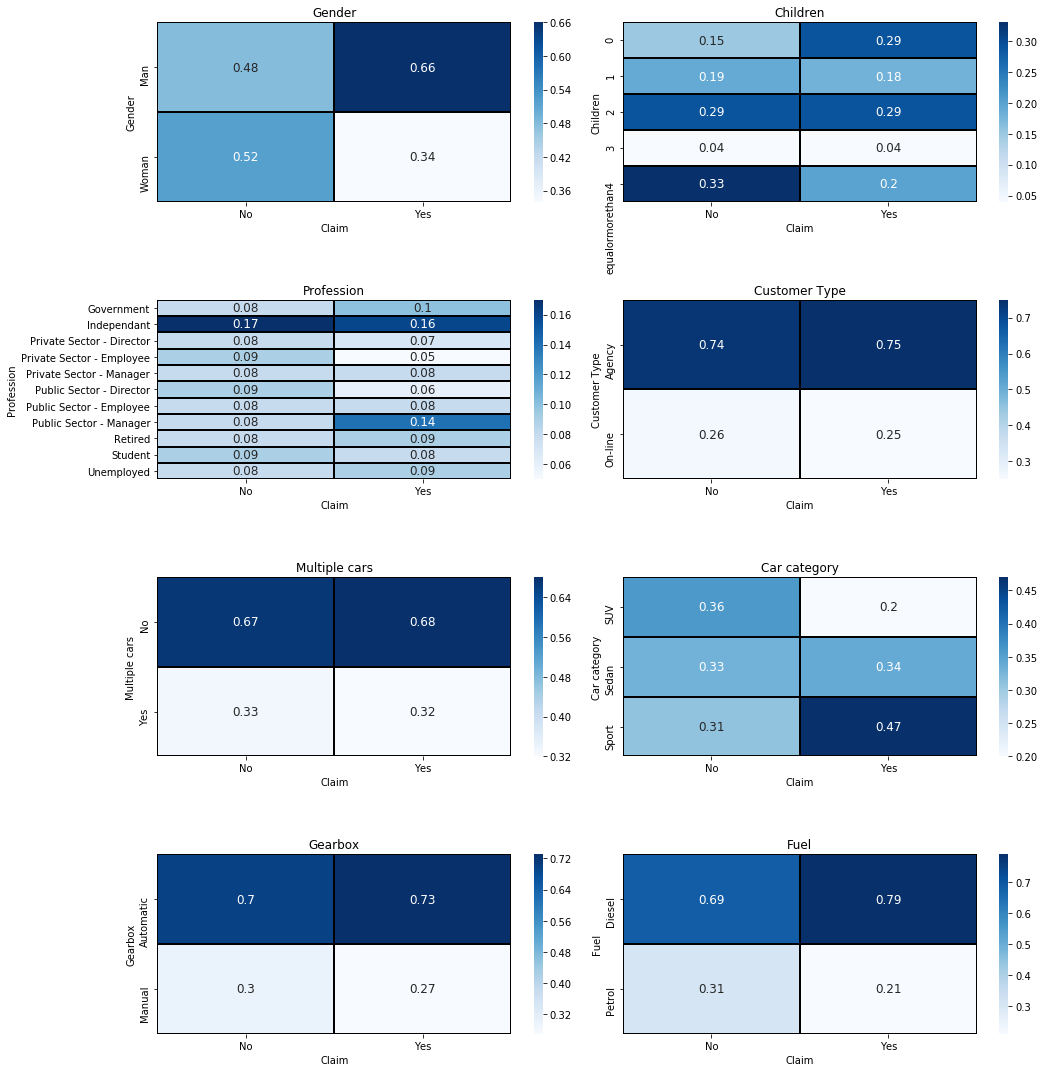

In [1338]:
position = 421

catCols = autoRisk.select_dtypes(include='object').columns.tolist()
a = catCols[:-1]

plt.figure(figsize=(15,15))

for col in a:
    plt.subplot(position)
    claimCol = autoRisk.groupby([col,'Claim']).ContractId.agg('count').sort_values(ascending=False)
    claimCol = pd.DataFrame(claimCol.groupby(level=1).apply(lambda x: (x/float(x.sum())).round(2)))
    claimCol = claimCol.unstack(1)
    ax = sb.heatmap(claimCol,annot=True,cmap='Blues',linewidths=1,linecolor='black',annot_kws={"size": 12})
    plt.title(col)
    ax.set_xticklabels(['No','Yes'])
    ax.set_xlabel('Claim')
    # fixing a heatmap bug...
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    position += 1
plt.tight_layout()

# Observations:
- **Gender**: Man are more to have their claims accepted where the case for women is the opposite
- **Children**: The more children an applicant has, the more likely he/she will get his/her claim rejected
- **Profession**: 
    - Overall it is much more likely to get claims rejected regardless of profession, except for government or public sector professions. 
    - In addition, public sector director and private sector employees are much more likely to have their claims rejected than accepted
- **Customer Type**: 
    - ***Claim approval/denial rate is pretty much the same***
    - Samples who came through agency are slightly more likely(1%) to be accpeted
- **Owning Multiple Cars**: 
    - ***Claim approval/denial rate is pretty much the same***
    - Samples who have multiple cars are slightly more likely to have their claims rejected
- **Car Categry**: 
    - Samples owning sport cars are mostly likely to have their claim accepted
    - Samples owning SUV cars are mostly likely to have their claim rejected
- **Gearbox**: 
    - ***Claim approval/denial rate is pretty much the same***
    - Vehicles with manual gearbox are slightly more likely (3%) to have insurance claims rejected
- **Fuel Type**:
    - People who drive diesel cars are more likely to have claims accepted
    - People who drive petrol cars are more likely to have claims rejected
    
## It appears that *Customer Type*, *Owning Multiple Cars*, and *Gearbox types* are not influential decision variables.
---

# Slicing the data by the two claim responses

In [1271]:
# viewing data by yes and no claim
claimYes = autoRisk.loc[autoRisk.Claim == 'Yes']
claimNo = autoRisk.loc[autoRisk.Claim == 'No']

# Comparing Claim Approval and Denial Rate in Each Categorical Values 

In [1273]:
def stackedHistBar(columnNames, dfList,axPosition, figSize, maxAx):
    counter = 1
    plt.figure(figsize = figSize)
    columnNames = columnNames
    
    for col in columnNames:
        plt.subplot(axPosition)
        if autoRisk[col].dtype != 'object':
            plt.hist(x = [dfList[0][col], dfList[1][col]], stacked=True, density=True,alpha = 0.9, label=['Yes','No'])
            plt.legend()
        else:
            total = autoRisk.shape[0]
            a = dfList[0][col].value_counts()/total
            b = dfList[1][col].value_counts()/total
            p1 = plt.bar(a.index, a.values)
            p2 = plt.bar(a.index, b.values, bottom=a.values)
            plt.legend((p1[0],p2[0]),('Yes','No'))
            if col == 'Profession':
                plt.xticks(rotation='vertical')
        plt.title(col)
        axPosition += 1
        counter += 1
        if counter > maxAx:
            break
    plt.tight_layout()

# Inspecting The Yes-And-No Claims Make Up in Each Variable

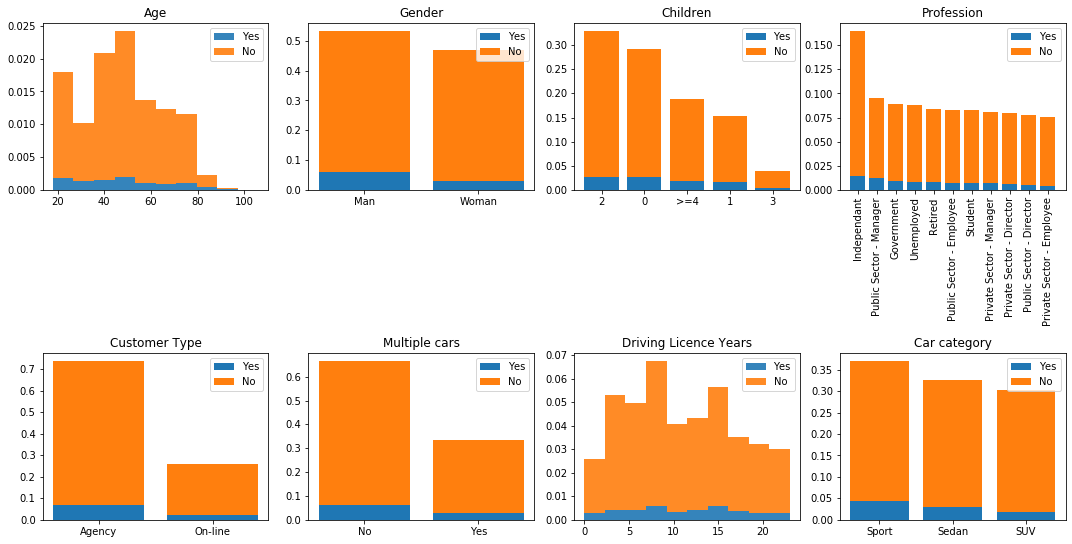

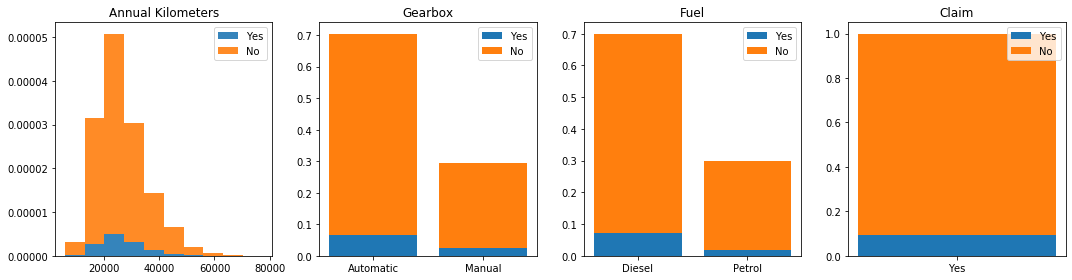

In [1274]:
columnNames = autoRisk.columns.tolist()[1:]

stackedHistBar(columnNames, [claimYes, claimNo], 341, (15,12), 8)
stackedHistBar(columnNames[-4:], [claimYes, claimNo], 141, (15,12/3), 4) 

# Observations:
- Most claims are rejected
- From the Age's histogram, we see that the top three most frequent applicant age is around 20-25, or from 40 to 50.
- There is a bimodal distribution for age; first peak locates at around 20 to 25 and second peak locates at around 40 to 50.
- Most sampled applicants have 2 kids
- Most sampled applicants are independent workers
- Most sampled applicants came through Agency
- Most sampled applicants have 1 vehicle
- There is also a bimodal distribution for driving license years; first peak at around 8 to 10 and second peak at around 15.
- Most sampled applicants own sport cars, with sedan being second, SUV being the least.
- The distribution for annual kilometers is slightly right-skewed; most sampled applicants have around 20000 kilometers driving distance on their vehicles.
- Most applicants' vehicles have automatic gearbox.
- Most applicants drive disel cars.
--- 

# Side-by-Side Comparison of Claim Approval and Denial Rate by Categorical Values

Age
Driving Licence Years
Annual Kilometers


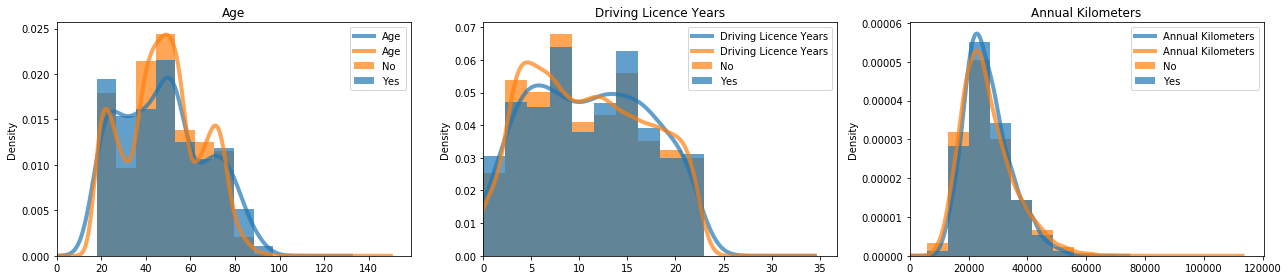

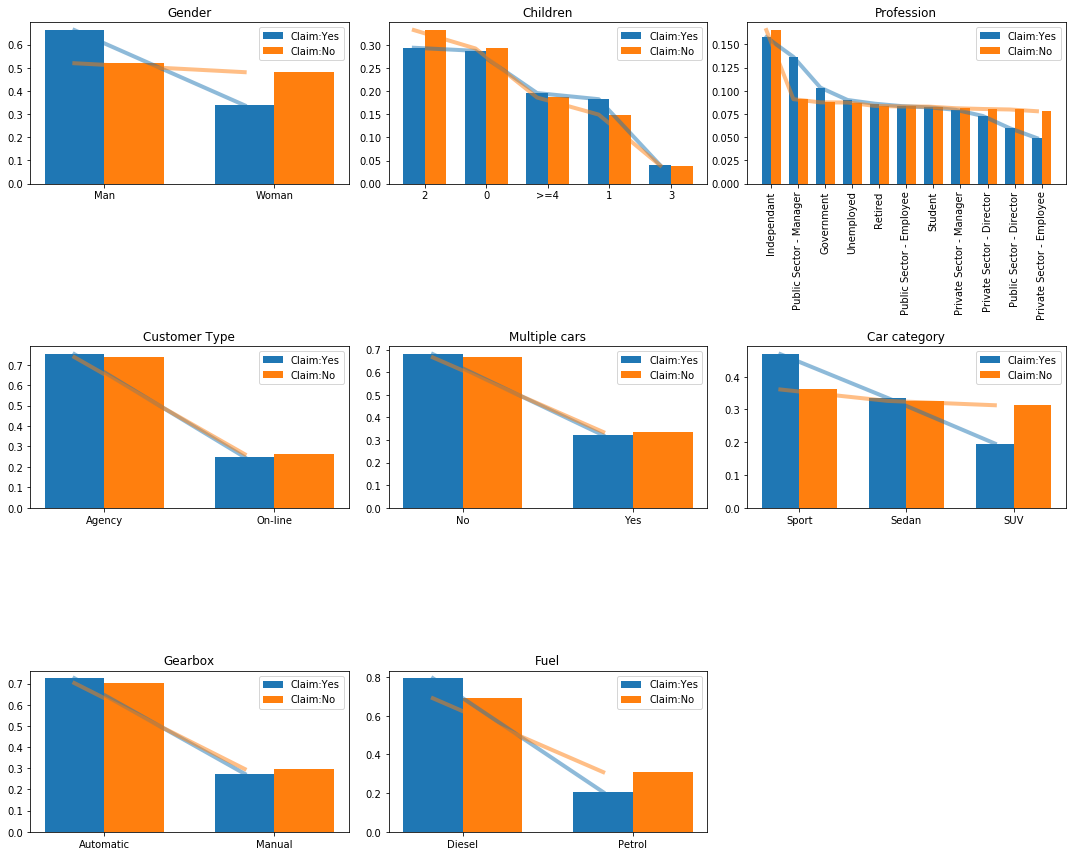

In [1337]:
# for numeric cols
numericCols = autoRisk.iloc[:,1:].select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(18,4))
position = 131
# for i in range(1):
for col in numericCols:
    plt.subplot(position)
    if i == 0: # first round make histogram
        plt.hist(x=[claimYes[col],claimNo[col]], density=True, histtype='stepfilled', alpha = 0.7, label=['Yes','No'])
        print(col)
        b1 = claimYes[col].plot(kind='kde',linewidth = 4, color ='C0', alpha = 0.7)
        b2 = claimNo[col].plot(kind='kde', linewidth = 4, color ='C1', alpha = 0.7)
        plt.legend()
        plt.xlim(left=0)
#         else: # second round make kde 
#             claimYes[col].plot(kind='kde')
#             claimNo[col].plot(kind='kde')
#             plt.xlim(left=0)
    plt.title(col)
    position += 1
plt.tight_layout()

# for object columns 
objectCols = autoRisk.iloc[:,1:].select_dtypes(include='object').columns.tolist()
position = 331
plt.figure(figsize=(15,12))
for col in objectCols:
    ax = plt.subplot(position)
    ind = np.arange(len(autoRisk[col].value_counts().index)) # setting the number of xticks place holders 
    total = claimYes[col].count()
    b1 = plt.bar(ind, claimYes[col].value_counts()/total, width=0.35)
    plt.plot(ind, claimYes[col].value_counts()/total, color = 'C0', linewidth = 4, alpha=0.5)
    total = claimNo[col].count()
    b2 = plt.bar(ind+0.35, claimNo[col].value_counts()/total, width=0.35)
    plt.plot(ind, claimNo[col].value_counts()/total, color = 'C1', linewidth = 4, alpha=0.5)

    ax.legend((b1[0], b2[0]),('Claim:Yes','Claim:No'))

    ax.set_xticks(ind + 0.35/2)
    xticks = claimYes[col].value_counts().index.tolist()
    if col == 'Profession':
        ax.set_xticklabels(xticks,rotation='vertical')
    else:
        ax.set_xticklabels(xticks)
    ax.set_title(col)
    position += 1
    if position == 339:
        break

plt.tight_layout()

# Observations:
- **Age**: Most rejected claims tend to be older where as most approved claims tend to be younger
- **Driving License Years**: The distribution for approved and denined claims appear identical. *However*, sampled applicants with fewer driving license years has a higher chance of having claims rejected. 
- **Annual Kilometers**: The distribution for approved and denined claims appear identical.*However*, sampled applicants who logged 25-35 thousands kilometers tend to have slightly higher claim approval rate.
- **Gender**: Both man and women's approval rate is higher than their claim denial rate; *However*, the claim approval rate for man is significantly higher than women's.
- **Children**: It appears there are more claim applicants with 0 or 2 kids, and their claims' are more likely to be rejected than to be accepted. There are less applicants who have 1 or more than 3 kids, and their claims are more likely to be accepted than rejected.
- **Profession**: Public sector managers have a significantly higher claim approval rate than all other professions, followed by people working in government. From this observation, one might infer applicants' whose jobs are more stable tend to have higher claim approval rate. But, interestingly, for people who are retired or unemployed, their claims' approval rate is slightly higher than their rejection rate. (*)
- **Multiple Cars**: Sampled applicants who don't multiple vehicles tend to have a slightly higher chance of havign their claims approved. 
- **Car Category**: The claim approval rate for people who own sport cars or sedan is higher than the corresponding claim denial rate -- the claim approval rate for people owning sport cars is significantly higher in comparison to people who own sedan. In contrast, sampled applicants who own SUV/s are more likely to have their claims denied.
- **Gearbox**: Vechicles with automatic gearbox have a slightly higher claim acceptance rate than rejection rate. It is the opposite in the case of manual vehicles.
- **Fuel**: Claims of diesel vehicles are more likely to be accepted, where as it is the opposite for sampled applicants owning petrol vehicles. 
---

# Further Break-Down by Each Claim Results:
## Approved Claims Variables' Values Break-Down

In [1077]:
def basicHistBar(df, axPosition, figSize, maxAx, color, label):
    counter = 1
    plt.figure(figsize = figSize)
    columns = df.columns.tolist() 
    for col in columns:
        plt.subplot(axPosition)
        if autoRisk[col].dtype == 'object':        
            data = df[col].value_counts(normalize=True)
            plt.bar(data.index, data.values, color = color, label = label)
            plt.title(col)
            if col == 'Profession' or col == 'Children':
                plt.xticks(rotation='vertical')
        else:
            plt.hist(df[col],color = color, label = label, density=True)
            plt.title(col)
        plt.legend()
        plt.ylabel('Probability')
        axPosition+=1
        counter += 1
        if counter > maxAx:
            break
    plt.tight_layout()

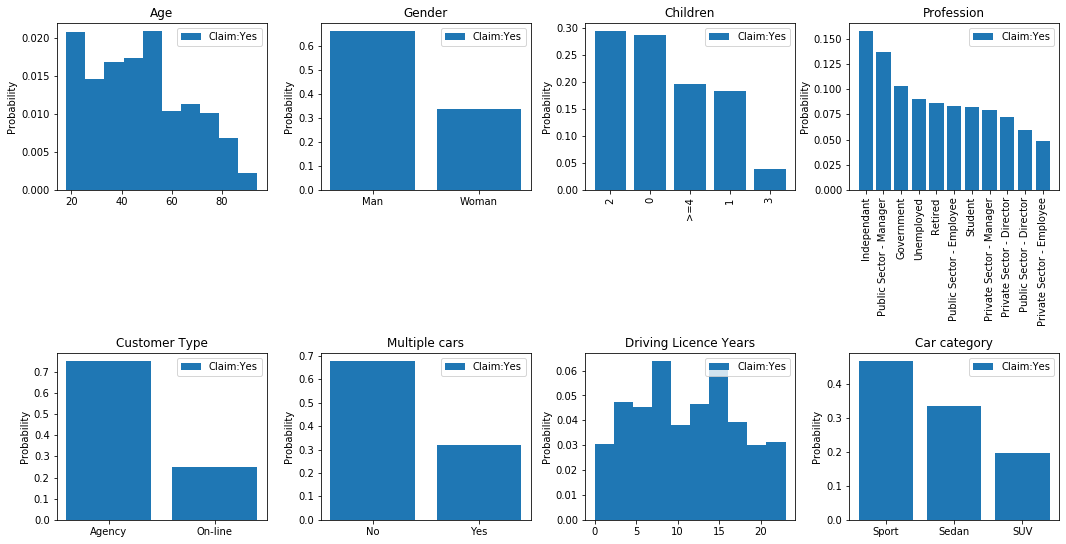

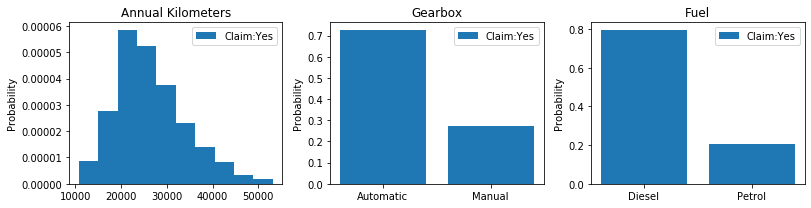

In [1287]:
basicHistBar(claimYes.iloc[:,1:],341,(15,12),8,'C0','Claim:Yes') # iloc excludes contract id
basicHistBar(claimYes.iloc[:,-4:],141,(15,3),3,'C0','Claim:Yes') # last 4 columns

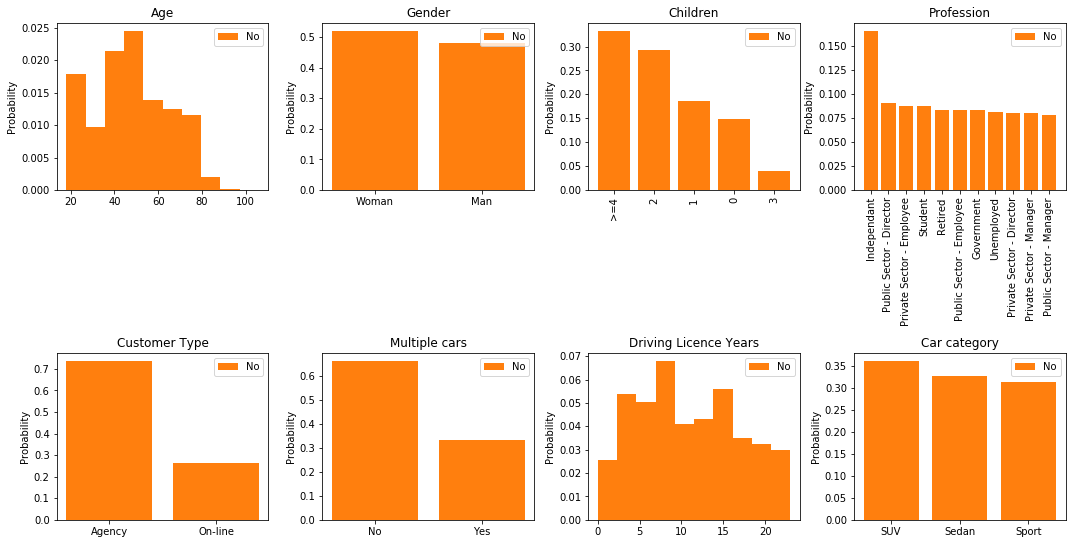

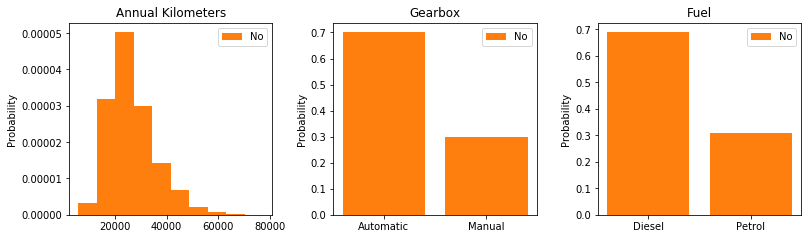

In [1288]:
basicHistBar(claimNo.iloc[:,1:],341,(15,12),8,'C1','No') # iloc excludes contract id
basicHistBar(claimNo.iloc[:,-4:],141,(15,12/3.5),3,'C1','No') # last 3 columns

# Observations:
The major further observations at this point, given the observations that have already been made previously, is that:
- Female claim denial rate for female applicants are much higher of male's.
- People with more children tend to have higher claim rejection rate. Also, It appears there are more claim applicants with 0 or 2 kids, and their claims' are more likely to be rejected than to be accepted. There are less applicants who have 1 or more than 3 kids, and their claims are more likely to be accepted than rejected.
- Independent workers have a much higher claim rejection rate
- Sampled applicants driving SUVs have a much higher claim rejection rate than if driving other types of vehicles
---
# Hypothesis:

If the **number of children** an applicant has and **the type of car they drive** (\**assuming single people are more likely to own sport cars and people with their own family are more likely to own SUVs*) ***indicates their family/marital status...***

and that

assuming **people who work in public sector** tend to have **more stable income level...**

> <font size=4.5>Then, the applicant profile of a **young, single male**, with **stable income** and **more years of driving experience** are more likely to have their **auto insurance claims accepted**.<font>

***

# Preprocessing before Data Model

In [1360]:
autoRisk.head()

,ContractId,Age,Gender,Children,Profession,Customer Type,Multiple cars,Driving Licence Years,Car category,Annual Kilometers,Gearbox,Fuel,Claim
0,1211,44,Woman,equalormorethan4,Unemployed,Agency,Yes,19,Sedan,36087,Automatic,Diesel,No
1,1212,21,Woman,0,Private Sector - Director,On-line,No,3,SUV,30367,Manual,Diesel,No
2,1213,76,Woman,1,Private Sector - Employee,Agency,No,19,SUV,27640,Automatic,Diesel,No
3,1214,29,Woman,equalormorethan4,Private Sector - Employee,On-line,No,11,Sedan,22780,Automatic,Diesel,No
4,1215,44,Man,0,Private Sector - Director,Agency,No,11,SUV,36477,Automatic,Diesel,No


## encoding categorical features

In [1361]:
# instantiate label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [1366]:
print(catCols)

['Gender', 'Children', 'Profession', 'Customer Type', 'Multiple cars', 'Car category', 'Gearbox', 'Fuel', 'Claim']


# Making Dummie Columns

In [1415]:
newCols = 0
for col in catCols:
    dummies = pd.get_dummies(autoRisk[col],drop_first=True)
    print(dummies.columns.tolist())
    newCols += len(dummies.columns.tolist())
    print('-----------------------------------------------------')
    autoRisk = pd.concat([autoRisk,dummies],axis=1)
print(newCols)

['Woman']
-----------------------------------------------------
['1', '2', '3', 'equalormorethan4']
-----------------------------------------------------
['Independant', 'Private Sector - Director', 'Private Sector - Employee', 'Private Sector - Manager', 'Public Sector - Director', 'Public Sector - Employee', 'Public Sector - Manager', 'Retired', 'Student', 'Unemployed']
-----------------------------------------------------
['On-line']
-----------------------------------------------------
['Yes']
-----------------------------------------------------
['Sedan', 'Sport']
-----------------------------------------------------
['Manual']
-----------------------------------------------------
['Petrol']
-----------------------------------------------------
['Yes']
-----------------------------------------------------
22


In [1416]:
autoRisk.iloc[:,-22:].head()

,Woman,1,2,3,equalormorethan4,Independant,Private Sector - Director,Private Sector - Employee,Private Sector - Manager,Public Sector - Director,...,Retired,Student,Unemployed,On-line,Yes,Sedan,Sport,Manual,Petrol,Yes
0,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Renaming Columns 1, 2, 3, equalormorethan4 to to 1 Child, 2 Children, 3 Children, >4Children

In [1418]:
autoRisk = autoRisk.rename(columns = {'1':'1Child',
                            '2':'2Children',
                            '3':'3Children',
                            'equalormorethan4':'>=4Children'})
autoRisk.iloc[:,-22:].head()

,Woman,1Child,2Children,3Children,>=4Children,Independant,Private Sector - Director,Private Sector - Employee,Private Sector - Manager,Public Sector - Director,...,Retired,Student,Unemployed,On-line,Yes,Sedan,Sport,Manual,Petrol,Yes
0,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Isolating Data for Modeling

In [1423]:
data = autoRisk.drop(catCols, axis=1)
data = data.drop('ContractId', axis=1)
data.head()

,Age,Driving Licence Years,Annual Kilometers,Woman,1Child,2Children,3Children,>=4Children,Independant,Private Sector - Director,...,Retired,Student,Unemployed,On-line,Yes,Sedan,Sport,Manual,Petrol,Yes
0,44,19,36087,1,0,0,0,1,0,0,...,0,0,1,0,1,1,0,0,0,0
1,21,3,30367,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,76,19,27640,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29,11,22780,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
4,44,11,36477,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [1428]:
# renaming first Yes column to 'Multiple Cars', second 'Yes' to ClaimAccepted
"""Implementation:
1. get the data column names with data.columns.tolist()
2. print the column names out
3. copy and paste it, then change the values manuually"""
data.columns = ['Age', 'Driving Licence Years', 'Annual Kilometers', 'Woman', '1Child', '2Children', '3Children', '>=4Children', 'Independant', 'Private Sector - Director', 'Private Sector - Employee', 'Private Sector - Manager', 'Public Sector - Director', 'Public Sector - Employee', 'Public Sector - Manager', 'Retired', 'Student', 'Unemployed', 'On-line', 'Multiple Cars', 'Sedan', 'Sport', 'Manual', 'Petrol', 'ClaimAccepted']
data.columns

Index(['Age', 'Driving Licence Years', 'Annual Kilometers', 'Woman', '1Child',
       '2Children', '3Children', '>=4Children', 'Independant',
       'Private Sector - Director', 'Private Sector - Employee',
       'Private Sector - Manager', 'Public Sector - Director',
       'Public Sector - Employee', 'Public Sector - Manager', 'Retired',
       'Student', 'Unemployed', 'On-line', 'Multiple Cars', 'Sedan', 'Sport',
       'Manual', 'Petrol', 'ClaimAccepted'],
      dtype='object')

# Train-Test Split Data

In [1429]:
# selecting X and y variables
X = data.drop('ClaimAccepted', axis=1)
y = data['ClaimAccepted']

In [1435]:
# Train-Test Split into 4 decks
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

# Building A Decision Tree Classifier

In [1446]:
from sklearn import tree
# instantiate tree
decision_tree = tree.DecisionTreeClassifier(random_state=1,max_depth=7)
# fit with train data
decision_tree_ = decision_tree.fit(X_train,y_train)
# make prediction with test data
tree_predictions = decision_tree.predict(X_test)

# Model Performance Evaluation

In [1447]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

tree_train_score = decision_tree.score(X_train,y_train)

print('Decision Tree Model Score:')
print('Score with Training Data:',tree_train_score)
print()
print(classification_report(y_test,tree_predictions))
print('-'*80)

Decision Tree Model Score:
Score with Training Data: 0.9133819951338199

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1867
           1       0.17      0.02      0.04       189

    accuracy                           0.90      2056
   macro avg       0.54      0.51      0.49      2056
weighted avg       0.84      0.90      0.86      2056

--------------------------------------------------------------------------------


# Observations:
- The score of the decision model is extremely high, indicating overfitting problem. The tree needed to be trimmed. 